# Convolutional Neural Network 구현
- MNIST 손글씨 data를 이용하여 CNN을 학습하고 MLP와 결과와 비교.

In [2]:
# google colab 사용하기 위해 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import matplotlib.pyplot as plt

# 학습 결과 그래프 함수
# loss 그래프
def plot_loss(history):
  plt.figure(figsize=(10, 7))
  plt.plot(history.history['loss'], label="TRAIN LOSS")
  plt.plot(history.history['val_loss'], label = "TEST LOSS")
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  
  
  # accuracy 그래프
def plot_accuracy(history):
  plt.figure(figsize=(10, 7))
  plt.plot(history.history['accuracy'], label = "TRAIN ACC")
  plt.plot(history.history['val_accuracy'], label="TEST ACC")
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

# MNIST CNN 적용

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

In [9]:
# mnist 이미지 로드
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
# 하이퍼 파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

In [14]:
# 이미지 전처리 - 정규화 
X_train = (train_image/255.0).astype(np.float32) # (60000, 28, 28)
X_test = (test_image/255.0).astype(np.float32) 

X_train = X_train[..., np.newaxis] # (60000, 28, 28) -> (60000, 28, 28, 1)
X_test = X_test[..., np.newaxis]

In [20]:
# 라벨 전처리 - onehotencoding
y_train = keras.utils.to_categorical(train_label) # (60000, 20)
y_test = keras.utils.to_categorical(test_label)

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

### Model (Network) 정의

In [25]:
def create_mnist_model():
  model = keras.Sequential()

  # input laye - Convolution layer의 input shape은 3차원으로 지정(height, width, channel), gray scale도 3차원으로 지정
  model.add(layers.InputLayer((28, 28, 1))) 



  # convolution block
  # convolution layer : Conv2D()
  model.add(layers.Conv2D(filters = 32, # Filter의 개수 (즉, 32개의 특징을 찾음)
                          kernel_size = (3, 3), # Filter shape (height, width) - height와 width가 같은 경우는 하나만 써줘도 됨
                          padding = "same",
                          strides = (1, 1), # 이동 간격. (좌우, 상하) - 좌우/상하 이동 간격이 동일하면 하나만 써줌. default (1,1)
                          activation = "relu"
                          ))
  
  # maxpoolint layer : MaxPooling2D()
  model.add(layers.MaxPooling2D(pool_size = (2, 2), # size(height, width) - height와 width가 같은 경우에는 하나만 써줘도 됨
                                strides=2, # 이동 간격 (좌우,상하) - 동일한 경우 하나만 써도 됨 (default : pool_size)
                                padding="same" # same, valid - same : 전체 input을 다 사용, valid = 마지막에 남는 영역은 버림
                                ))
  
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding="same",activation="relu"))
  model.add(layers.MaxPooling2D(padding="same"))

  model.add(layers.Conv2D(filters=128, kernel_size=3, padding = "same", activation = "relu"))
  model.add(layers.MaxPooling2D(padding = "same"))



  # Dense layer추가
  model.add(layers.Flatten())

  model.add(layers.Dense(units = 256, activation = "relu"))
  model.add(layers.Dense(units = 10, activation = "softmax")) # 다중 분류 출력 레이어

  return model

In [48]:
model = create_mnist_model()
model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

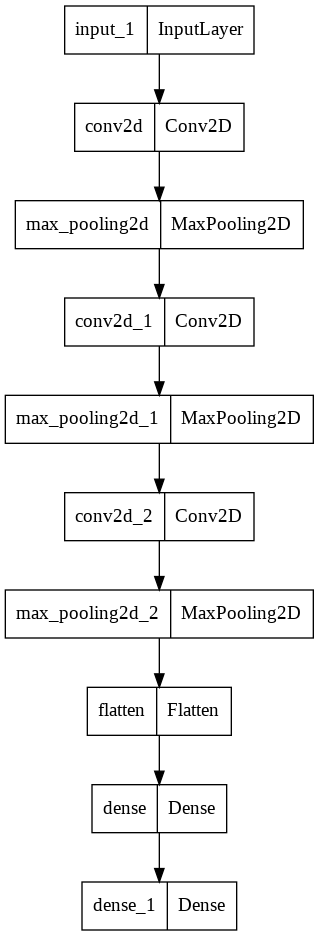

In [28]:
keras.utils.plot_model(model)

In [50]:
hist = model.fit(train_dataset, epochs = N_EPOCHS, validation_data = test_dataset)

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.1647 - accuracy: 0.9482 - val_loss: 0.0366 - val_accuracy: 0.9876
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0328 - val_accuracy: 0.9895
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0370 - val_accuracy: 0.9882
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0220 - val_accuracy: 0.9928
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0345 - val_accuracy: 0.9899
Epoch 

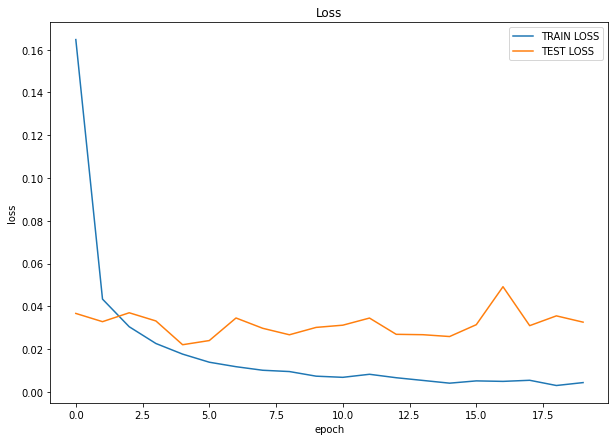

In [51]:
plot_loss(hist)

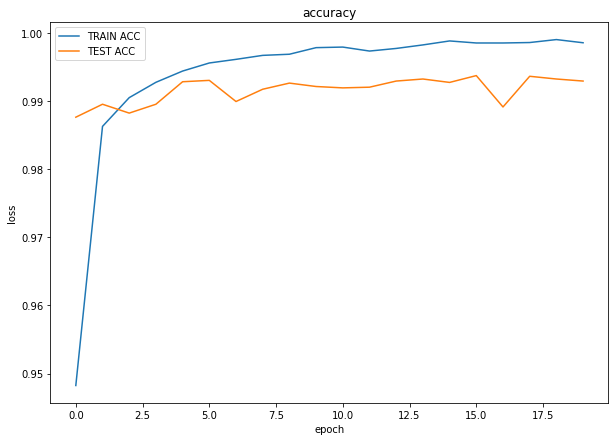

In [52]:
plot_accuracy(hist)

In [53]:
# 최종 검증
loss, acc = model.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9929


### prediction error가 발생한 example 확인

In [54]:
pred = model.predict(X_test)
pred.shape # (10000, 10) 각 숫자별 확률 값 

(10000, 10)

In [55]:
pred_label = np.argmax(pred, axis=-1)
idx = np.where(test_label != pred_label)[0]
idx.shape

(71,)

In [56]:
idx.shape

(71,)

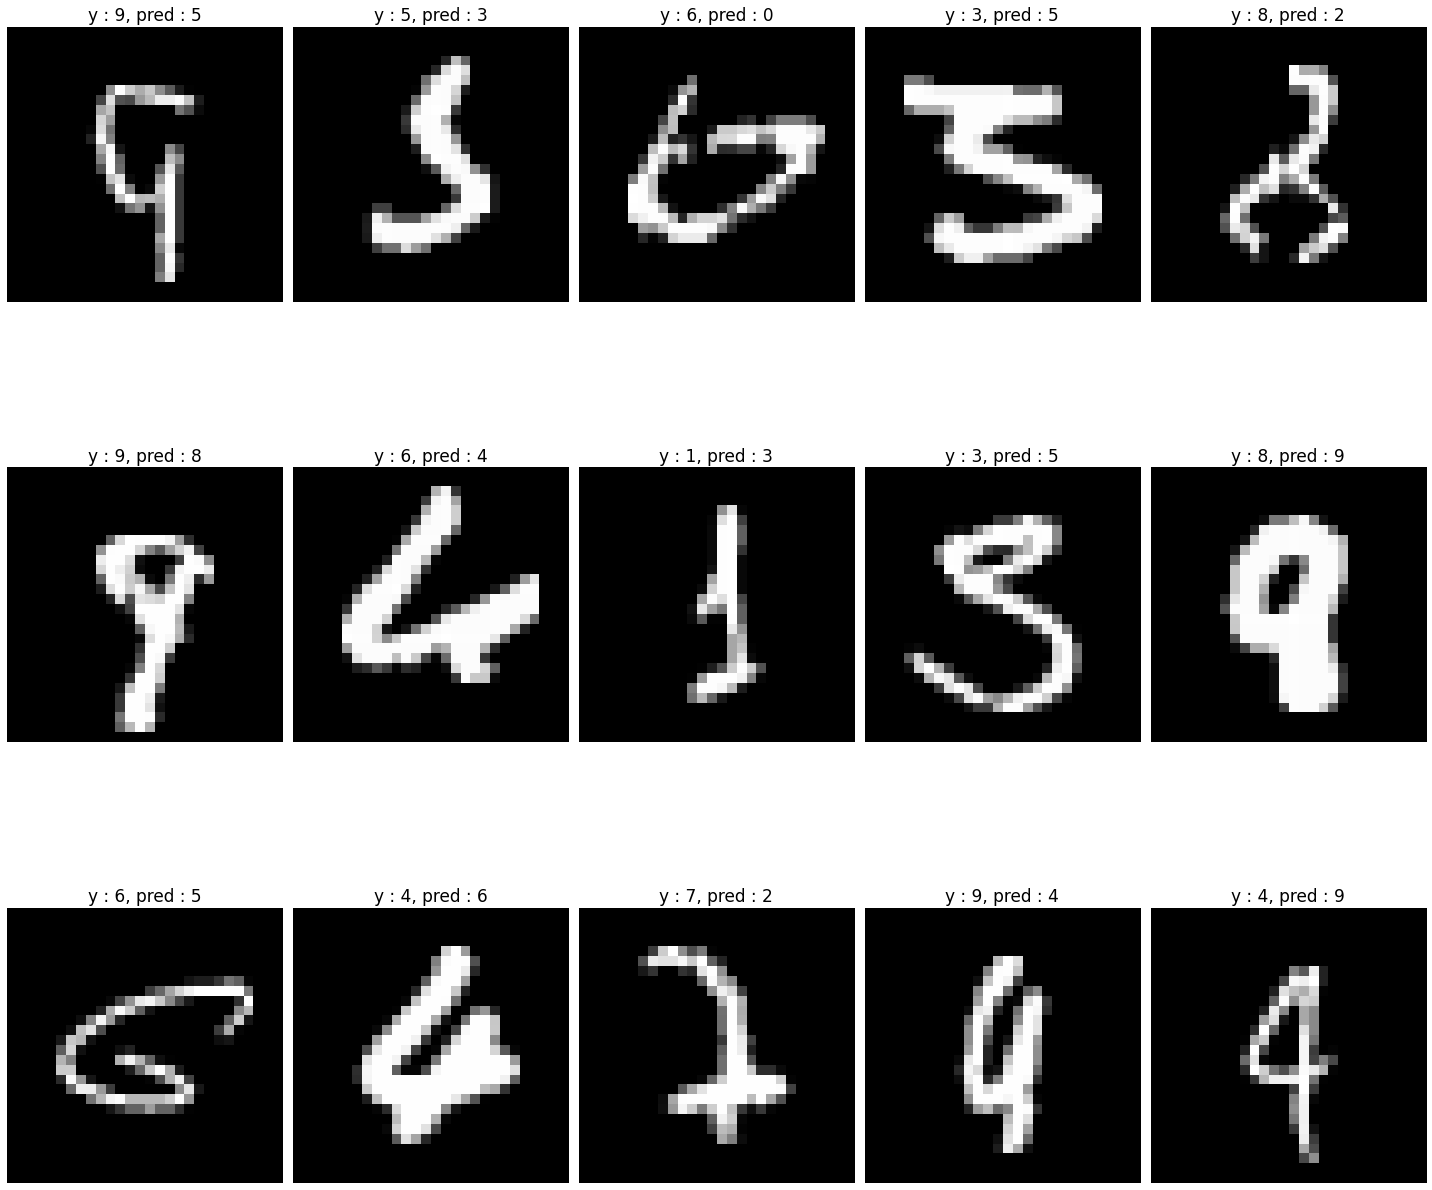

In [57]:
# 틀린 결과 중에 15개 확인

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for i in range(15):
  error_idx = idx[i]

  p = pred_label[error_idx] # 예측
  y = test_label[error_idx] # 정답

  plt.subplot(3, 5, i+1)
  plt.imshow(test_image[error_idx], cmap='gray')
  plt.title("y : {}, pred : {}".format(y, p), fontsize=17)
  plt.axis("off")

plt.tight_layout()
plt.show()

# 모델 저장
1. 학습이 끝난 모델의 파라미터만 저장
1. 모델 전체 저장
1. Callback 함수를 이용해 학습시 가장 좋은 지표의 모델 저장

## 텐서플로 파일 타입
- checkpoint 
    - 모델의 weight를 저장하기 위한 파일타입
- SavedModel 
    - 모델의 구조와 파라미터들을 모두 저장하는 형식

## 학습한 Weight (파라미터) 저장 및 불러오기
- 가중치를 저장하여 나중에 재학습 없이 학습된 가중치를 사용할 수 있다.
- 저장: `model.save_weights("저장경로")`
- 불러오기: `model.load_weights('불러올경로')`
- 저장형식
    - Tensorflow Checkpoint (기본방식)
    - HDF5
        - `save_weights(.., save_format='h5')`

In [61]:
# 경로 설정
import os

base_dir = "/content/drive/MyDrive/ColabNotebooks"
mnist_weight_dir = os.path.join(base_dir, "mnist_weight") # 가중치 저장할 경로 
# /content/drive/MyDrive/ColabNotebooks/mnist_weight

if not os.path.isdir(mnist_weight_dir):
  os.mkdir(mnist_weight_dir)

weight_file_path = os.path.join(mnist_weight_dir, "mnist_weight.ckpt")

In [62]:
# weight_file_path 경로에 학습된 parameter(weight) 저장
model.save_weights(weight_file_path) 

In [65]:
# 저장된 weight들을 불러오기
# 모델을 생성한 뒤에 저장된 weight들을 덮어 씌우는 형식

new_model = create_mnist_model()
new_model.compile(optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss = "categorical_crossentropy", metrics = ['accuracy'])

new_model.load_weights(weight_file_path)

In [66]:
# 평가
new_model.evaluate(test_dataset)

100/100 [==============================] - 1s 4ms/step - loss: 0.0326 - accuracy: 0.9929


[0.0325637012720108, 0.992900013923645]

## 전체 모델 저장하고 불러오기
- 저장: `model.save('저장할디렉토리')`
- 불러오기: `tf.keras.models.load_model('저장디렉토리경로')`
- 저장 형식
    - Tensorflow SavedModel 형식(기본방식)
        - 모델 아키텍처 및 훈련 구성(옵티마이저, 손실 및 메트릭 포함)은 saved_model.pb 에 저장된다.
        - 파라미터는 variables/ 디렉토리에 저장된다.
        - https://www.tensorflow.org/guide/saved_model?hl=ko#the_savedmodel_format_on_disk
    - HDF5 형식
        - `save(..., save_format='h5')` 로 지정한다.

In [67]:
# 경로 설정
mnist_model_dir = os.path.join(base_dir, "mnist_model")

if not os.path.isdir(mnist_model_dir):
  os.mkdir(mnist_model_dir)

In [68]:
# 모델 저장
model.save(mnist_model_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/mnist_model/assets


In [69]:
# 불러오기
new_model2 = keras.models.load_model(mnist_model_dir)

In [70]:
# 평가
new_model2.evaluate(test_dataset)

100/100 [==============================] - 1s 5ms/step - loss: 0.0326 - accuracy: 0.9929


[0.0325637012720108, 0.992900013923645]

## Callback을 사용한 모델 저장 및 Early Stopping
- callback은 학습하는 도중 특정 이벤트 발생시 호출되는 다양한 함수를 제공하여 자동화 처리를 지원 
  - (cf: 프로그래밍의 콜백함수)
- 다양한 콜백 클래스가 제공
    - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
- `EarlyStopping`: Validation set에 대한 평가지표가  더 이상 개선되지 않을 때 학습을 자동으로 멈춤
    - `monitor`: 모니터링할 평가지표 지정. (ex: accuracy)
    - `patience`: epoch 수 지정. validation 평가 지표가 개선이 안되더라도 지정한 epoch만큼 반복한다. 지정한 epoch만큼 반복 후에도 개선이 되지 않으면 중단 
- `ModelCheckpoint`: 지정한 평가지표(예:validation loss)가 가장 좋을 때 모델과 weight를 저장하여 overfitting이 발생하기 전의 model을 나중에 불러들여 사용할 수 있음
    - `save_best_only=True`: monitoring 중인 measure를 기준으로 최적의 모형의 weight만 저장 
- **callback 객체들을 리스트로 묶은 뒤 fit()의 callback 매개변수에 전달한다.**

In [80]:
# 모델 생성
model2 = create_mnist_model()
model2.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [82]:
# 경로 설정
checkpoint_save_dir = os.path.join(base_dir, "mnist_callback")
if not os.path.isdir(checkpoint_save_dir):
  os.mkdir(checkpoint_save_dir)

checkpoint_save_file = os.path.join(checkpoint_save_dir, 'saved_model_{epoch:04d}.ckpt') # {epoch:04d} :에 몇번째 epoch

In [83]:
# callback 생성
# ModelCheckpoint - 모델을 저장해주는 callback

mc_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_file,
                                              save_weight_only = True, # weight만 저장
                                              save_best_only = True, # 가장 성능 지표가 좋았던 에폭의 모델 저장
                                              monitor = "val_loss", # 확인할 성능지표
                                              verbose=2, # 저장 로그
                                              )

# EarlyStopping - 성능개선이 없으면 전체 epoch 다 반복하지 않고 중간에 멈추는 callback

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', # 확인할 성능지표
                                            patience = 5, # 지정한 에폭수(5)만큼 학습하는 동안 성능 개선이 없으면 학습을 멈춤
                                            )

In [84]:
# 학습
hist =  model2.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[mc_callback, es_callback])

Epoch 1/100
598/600 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.9479
Epoch 00001: val_loss improved from inf to 0.04180, saving model to /content/drive/MyDrive/ColabNotebooks/mnist_callback/saved_model_0001.ckpt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/mnist_callback/saved_model_0001.ckpt/assets
600/600 [==============================] - 5s 8ms/step - loss: 0.1611 - accuracy: 0.9481 - val_loss: 0.0418 - val_accuracy: 0.9869
Epoch 2/100
598/600 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9865
Epoch 00002: val_loss improved from 0.04180 to 0.03930, saving model to /content/drive/MyDrive/ColabNotebooks/mnist_callback/saved_model_0002.ckpt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/mnist_callback/saved_model_0002.ckpt/assets
600/600 [==============================] - 4s 7ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0393 - val_accuracy: 0.9868
Epoch 3/100
597/600 

In [86]:
new_model3 = keras.models.load_model("/content/drive/MyDrive/ColabNotebooks/mnist_callback/saved_model_0005.ckpt")
new_model3.evaluate(test_dataset)

100/100 [==============================] - 1s 4ms/step - loss: 0.0231 - accuracy: 0.9933


[0.023135611787438393, 0.9933000206947327]